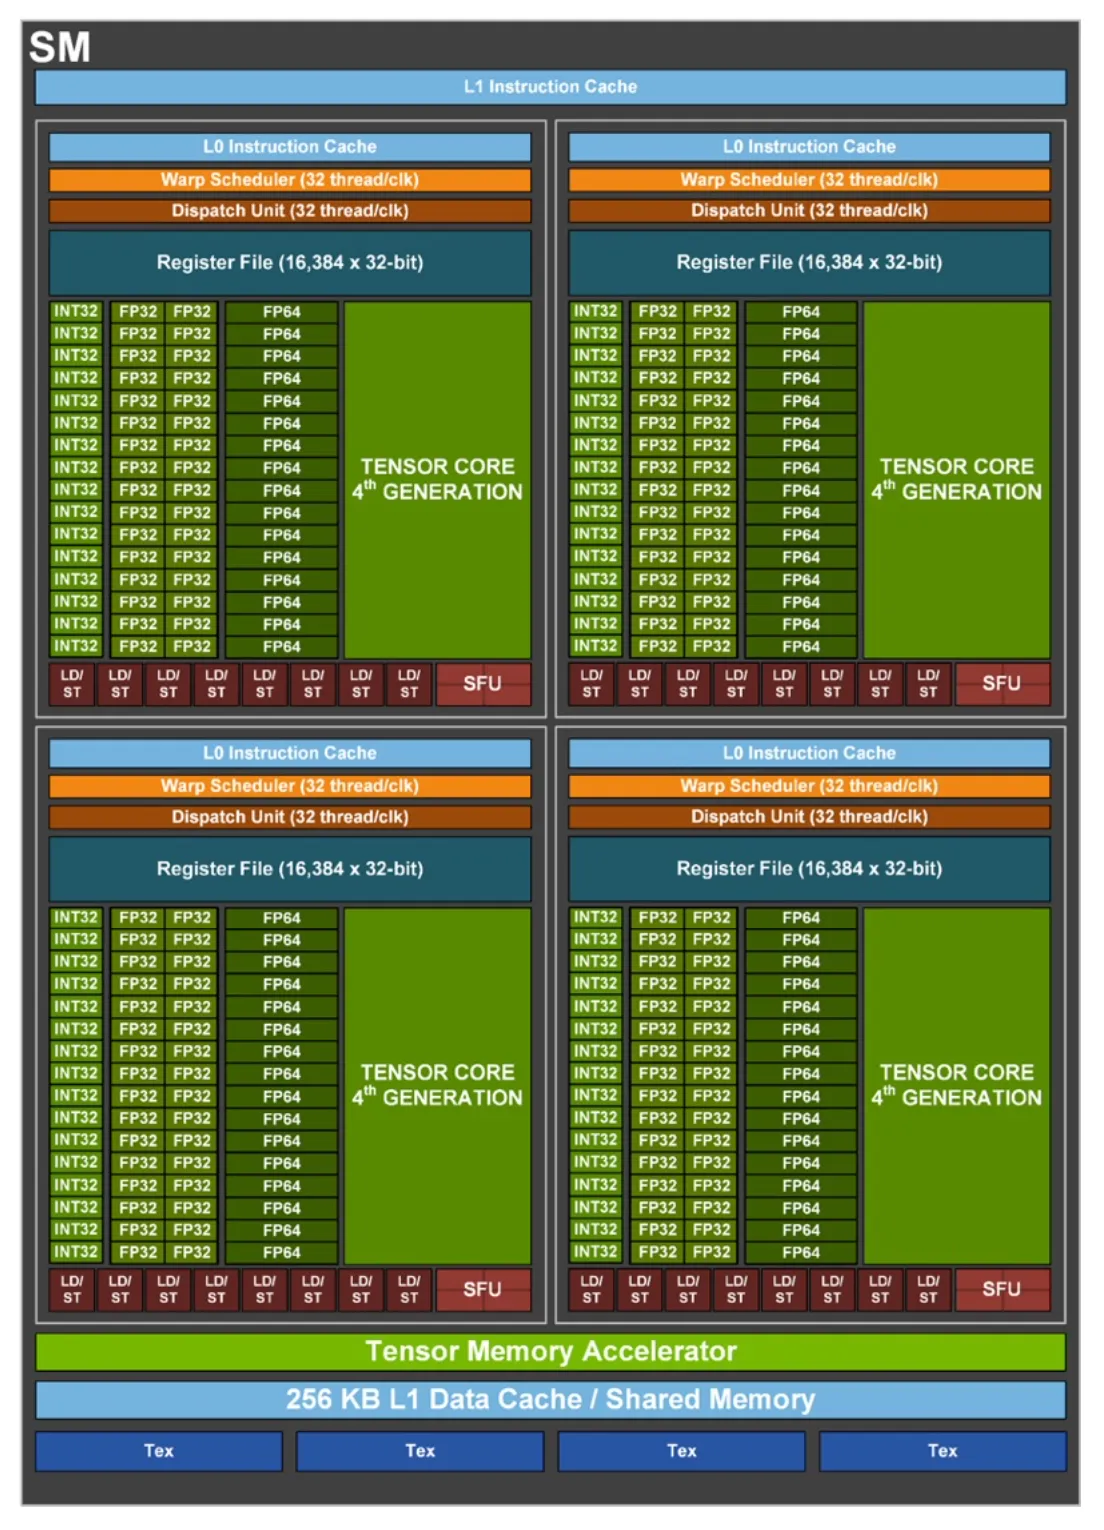

In [2]:
from IPython.display import Image, display

image_path = r"F:\works\DeepLearning\Cuda\1. GPU DESIGN\images\physical\SM.png"

display(Image(filename=image_path))

### **Streaming Multiprocessor**

---

## 🔥 What is an SM (Streaming Multiprocessor)?

* An **SM** is a **core computing unit** inside an NVIDIA GPU.
* It’s a **mini GPU** inside the GPU — it contains:

  * Multiple **CUDA cores** (ALUs) that actually execute threads
  * **Warp schedulers** that dispatch warps to CUDA cores
  * **Special function units** (for math like sin, cos, etc.)
  * **Shared memory** (fast on-chip memory shared by threads in a block)
  * **Registers** for storing thread-local variables
  * Cache units for fast data access

---

## 🧮 How many SMs are there?

* The **number of SMs varies** by GPU model and architecture. 

You can find the exact number by querying the device properties in CUDA:

```cpp
cudaDeviceProp deviceProp;
cudaGetDeviceProperties(&deviceProp, device_id);
printf("SM count: %d\n", deviceProp.multiProcessorCount); // 28 for rtx-3060
```

---

## ⚙️ Why are SMs important?

1. **Execution Parallelism**

   * Each SM can run many warps **concurrently**.
   * More SMs → more parallel work done → better throughput.

2. **Resource Management**

   * SMs manage **registers**, **shared memory**, and **warp scheduling**.
   * Limits on these resources on an SM affect **how many threads/blocks** you can run simultaneously (called **occupancy**).

3. **Performance Tuning**

   * Understanding SMs helps you optimize:

     * How many blocks you launch (to keep SMs busy)
     * Shared memory usage per block (to avoid limiting active blocks)
     * Warp scheduling (avoid warp divergence)

4. **Bottleneck Identification**

   * Knowing SM count and limits helps diagnose why your GPU program might be underperforming.

---

## 🧠 Summary Table

| Feature        | Description                                           |
| -------------- | ----------------------------------------------------- |
| Number per GPU | Varies by GPU model (from \~10 to 100+ SMs)           |
| Contains       | CUDA cores, warp schedulers, shared memory, registers |
| Runs           | Thread blocks as warps, manages scheduling            |
| Important for  | Parallel throughput, resource management, occupancy   |

---

## Quick Example

If your GPU has 68 SMs, and each SM can run 32 warps concurrently, your GPU can manage:

```
68 SMs × 32 warps/SM × 32 threads/warp = 69,632 threads simultaneously
```

---
 

``` cpp

      ┌────────────────────────────────────────────┐
      │                  SM                        │
      │  ┌──────────────────────────────────────┐  │
      │  │  Warp Schedulers                     │  │
      │  ├──────────────────────────────────────┤  │
      │  │  Register File (for 1024s of threads)│  │
      │  ├──────────────────────────────────────┤  │
      │  │  Shared Memory / L1 Cache            │  │
      │  ├──────────────────────────────────────┤  │
      │  │  CUDA Cores (SPs)                    │  │
      │  │  Special Function Units              │  │
      │  │  Load/Store Units                    │  │
      │  │  Tensor Cores (if supported)         │  │
      │  └──────────────────────────────────────┘  │
      └────────────────────────────────────────────┘

```
